In [1]:
import pandas as pd
import numpy as np
np.random.seed()
import seaborn as sns
from sqlalchemy import create_engine, MetaData, Table, inspect

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=250&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=250&sexo=m")
nomes = pd.concat([nomes_f, nomes_m])['nome'].to_frame()    # contatena os DF usando a variável 'nome' em um novo DF
print(f'Quantidade de nomes: {len(nomes)}')
nomes

Quantidade de nomes: 500


,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
245,EDMAR
246,ENZO
247,JURANDIR
248,EDGAR


In [3]:
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, len(nomes))
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes['id'] = nomes.index + 1
nomes = nomes.set_index('id')
nomes

,nome,id_aluno,dominio,email
id,,,,
1,MARIA,179,@servicodoemail.com,maria@servicodoemail.com
2,ANA,121,@dominiodoemmail.com.br,ana@dominiodoemmail.com.br
3,FRANCISCA,235,@dominiodoemmail.com.br,francisca@dominiodoemmail.com.br
4,ANTONIA,245,@servicodoemail.com,antonia@servicodoemail.com
5,ADRIANA,202,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
246,EDMAR,364,@servicodoemail.com,edmar@servicodoemail.com
247,ENZO,231,@servicodoemail.com,enzo@servicodoemail.com
248,JURANDIR,454,@servicodoemail.com,jurandir@servicodoemail.com


In [4]:
# cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')  # retorna uma lista de DF
# cursos = cursos[0]  # retorna um DF
cursos = pd.read_csv('cursos.csv')
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})       # renomeando coluna
cursos['id'] = cursos.index + 1     # cria uma nova variável 'id'
cursos = cursos.set_index('id')     # define a nova variável como index
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


qtd_cursos,qtd_alunos
1,246
2,113
3,72
4,28
5,24
6,11
7,3
9,2
10,1


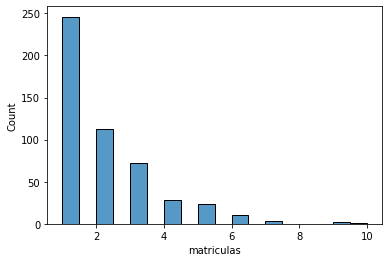

In [5]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=(len(nomes))) * 1.5).astype(int)
sns.histplot(nomes.matriculas)
# nomes.matriculas.describe()

qtd_matriculas = pd.DataFrame(nomes.matriculas.value_counts())
qtd_matriculas = qtd_matriculas.rename(columns={'matriculas':'qtd_alunos'})
qtd_matriculas.columns.name = 'qtd_cursos'
qtd_matriculas

In [6]:
nomes.sample(15)

,nome,id_aluno,dominio,email,matriculas
id,,,,,
160,ARNALDO,234,@servicodoemail.com,arnaldo@servicodoemail.com,2
113,VANDERLEI,99,@dominiodoemmail.com.br,vanderlei@dominiodoemmail.com.br,3
24,FERNANDO,470,@servicodoemail.com,fernando@servicodoemail.com,1
152,SEVERINA,168,@servicodoemail.com,severina@servicodoemail.com,3
147,WILIAN,473,@servicodoemail.com,wilian@servicodoemail.com,1
100,DENISE,159,@dominiodoemmail.com.br,denise@dominiodoemmail.com.br,4
195,CLARA,396,@dominiodoemmail.com.br,clara@dominiodoemmail.com.br,2
149,JANETE,126,@servicodoemail.com,janete@servicodoemail.com,1
92,CELIA,491,@dominiodoemmail.com.br,celia@dominiodoemmail.com.br,3


In [7]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)

for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    cont = 0
    cursos_aluno = []
    while cont < matriculas:
        curso = np.random.choice(cursos.index, p=prob)
        if(curso not in cursos_aluno):
            todas_matriculas.append([id, curso])
            cursos_aluno.append(curso)
            cont += 1

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])
matriculas.sort_values(['id_curso'])

,id_aluno,id_curso
134,302,1
645,361,1
675,143,1
128,382,1
127,421,1
...,...,...
449,186,20
58,443,20
524,141,20
508,4,20


In [8]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'qtd_alunos'})
matriculas_por_curso

,qtd_alunos,nome_do_curso
id_curso,,
1,60,Lógica de programação
2,32,Java para Web
3,105,C# para Web
4,94,Ruby on Rails
5,40,Cursos de Python
6,47,PHP com MySql
7,101,.NET para web
8,52,Novas integrações com Java
9,39,TDD com Java


In [9]:
engine = create_engine('sqlite:///:memory:')
matriculas_por_curso.to_sql('matriculas', engine)
inspect(engine).get_table_names()

['matriculas']

In [10]:
query = 'select * from matriculas where qtd_alunos < 30'
pd.read_sql(query, engine)

,id_curso,qtd_alunos,nome_do_curso
0,10,3,Código limpo com C#
1,17,5,Internet das coisas
2,18,12,Programação funcional
3,19,14,Boas práticas em Java
4,20,9,Orientação objetos com Java


In [11]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_alunos'])
muitas_matriculas = muitas_matriculas.query('qtd_alunos > 75')
muitas_matriculas

,nome_do_curso,qtd_alunos
2,C# para Web,105
3,Ruby on Rails,94
6,.NET para web,101
10,Preparatório para certificação Java,102
11,Hardware básico,81
12,Persistência com .NET,91
15,Estatística básica,78


In [12]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)
inspect(engine).get_table_names()

['matriculas', 'muitas_matriculas']

In [13]:
# id_curso = 16
curso = 'Estatística básica'
id_curso = cursos.query(f'nome_do_curso == "{curso}"').index[0]

nome_curso = cursos.loc[id_curso]
nome_curso = nome_curso.nome_do_curso
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]
proxima_turma = proxima_turma.rename(columns={'nome':f'Alunos do curso de {nome_curso}'})
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
180,PATRICIA
120,BRUNA
445,LETICIA
478,VERA
167,JOSEFA
...,...
160,ALFREDO
270,LUCIO
123,EDNALDO
